# Scraping Advanced Stats

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup



Scrape Brunson's Advanced Stats per season from basketball reference

In [2]:
def get_adv_stats(url, table_id):
    
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        stats_table = soup.find('table', {'id': table_id})
        if stats_table is None:
            print(f"Table with ID '{table_id}' not found.")
            return pd.DataFrame()

        # Moved this line outside the if block
        season_stats = pd.read_html(str(stats_table))[0]

        return season_stats
    
    except Exception as e:
        print(f"Error retrieving 23-24 season data:", e)
        return pd.DataFrame()

url = f"https://www.basketball-reference.com/players/b/brunsja01.html#all_advanced"
table_id = "advanced"
adv_stats = get_adv_stats(url, table_id)

adv_stats


/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_2947/390469538.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  season_stats = pd.read_html(str(stats_table))[0]


,Season,Age,Team,Lg,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,2018-19,22,DAL,NBA,PG,73.0,38.0,1591.0,12.7,0.549,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,NaN
1,2019-20,23,DAL,NBA,PG,57.0,16.0,1022.0,14.9,0.553,...,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3,NaN
2,2020-21,24,DAL,NBA,PG,68.0,12.0,1697.0,17.1,0.618,...,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2,6MOY-4
3,2021-22,25,DAL,NBA,SG,79.0,61.0,2524.0,17.1,0.583,...,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9,NaN
4,2022-23,26,NYK,NBA,PG,68.0,68.0,2379.0,21.2,0.597,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,"MVP-12,CPOY-4"
5,2023-24,27,NYK,NBA,PG,77.0,77.0,2726.0,23.4,0.592,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,"MVP-5,CPOY-5,AS,NBA2"
6,2024-25,28,NYK,NBA,PG,9.0,9.0,311.0,21.6,0.582,...,30.0,1.0,0.0,1.0,0.160,4.1,-2.4,1.7,0.3,NaN
7,7 Yrs,7 Yrs,7 Yrs,7 Yrs,NaN,431.0,281.0,12250.0,18.7,0.587,...,24.7,28.6,9.6,38.2,0.150,2.6,-0.5,2.1,12.7,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DAL (4 Yrs),DAL (4 Yrs),DAL (4 Yrs),DAL (4 Yrs),NaN,277.0,127.0,6834.0,15.8,0.580,...,20.6,11.9,5.4,17.3,0.121,0.4,-0.4,0.0,3.5,NaN


## Cleaning the data

Getting rid of unnecessary columns and rows to prepare for joining with the combined stats dataframe


In [3]:
adv_stats.drop(columns=['Lg', 'Age'], inplace=True)
adv_stats.drop(index=[6, 7,8,9,10], inplace=True)
adv_stats


,Season,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,2018-19,DAL,PG,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,NaN
1,2019-20,DAL,PG,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,...,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3,NaN
2,2020-21,DAL,PG,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,...,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2,6MOY-4
3,2021-22,DAL,SG,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,...,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9,NaN
4,2022-23,NYK,PG,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,"MVP-12,CPOY-4"
5,2023-24,NYK,PG,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,...,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,"MVP-5,CPOY-5,AS,NBA2"


In [4]:
adv_stats.head()

,Season,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
0,2018-19,DAL,PG,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,NaN
1,2019-20,DAL,PG,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,...,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3,NaN
2,2020-21,DAL,PG,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,...,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2,6MOY-4
3,2021-22,DAL,SG,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,...,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9,NaN
4,2022-23,NYK,PG,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,"MVP-12,CPOY-4"


In [5]:
# Columns
adv_stats.rename(columns={'G': 'Games_Sn', 'GS': 'GS_Sn', 'VORP':'ValORP'}, inplace=True)

adv_stats.drop(columns=['Pos'], inplace=True)


In [6]:
adv_stats.head()

,Season,Team,Games_Sn,GS_Sn,MP,PER,TS%,3PAr,FTr,ORB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP,Awards
0,2018-19,DAL,73.0,38.0,1591.0,12.7,0.549,0.320,0.212,1.7,...,19.1,1.5,1.0,2.6,0.077,-1.2,-0.5,-1.7,0.1,NaN
1,2019-20,DAL,57.0,16.0,1022.0,14.9,0.553,0.309,0.193,2.3,...,20.4,1.6,0.6,2.1,0.101,0.1,-1.0,-0.9,0.3,NaN
2,2020-21,DAL,68.0,12.0,1697.0,17.1,0.618,0.319,0.241,1.8,...,20.2,3.9,1.1,5.1,0.143,1.5,-0.6,0.9,1.2,6MOY-4
3,2021-22,DAL,79.0,61.0,2524.0,17.1,0.583,0.250,0.211,1.9,...,21.9,4.9,2.7,7.5,0.143,0.9,0.0,0.9,1.9,NaN
4,2022-23,NYK,68.0,68.0,2379.0,21.2,0.597,0.269,0.328,1.8,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,"MVP-12,CPOY-4"


In [7]:
adv_stats.corr(numeric_only=True)

,Games_Sn,GS_Sn,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,ValORP
Games_Sn,1.000000,0.680193,0.810480,0.318429,0.240945,-0.285759,0.232388,-0.714958,-0.189176,-0.326748,...,-0.638106,0.359754,0.508474,0.821758,0.608570,0.378877,0.282031,0.929309,0.375974,0.464841
GS_Sn,0.680193,1.000000,0.901885,0.714794,0.154044,-0.460429,0.669359,-0.420534,-0.665050,-0.725041,...,-0.701899,0.800752,0.810961,0.846845,0.850977,0.676483,0.695473,0.653476,0.748997,0.818862
MP,0.810480,0.901885,1.000000,0.777966,0.507096,-0.470250,0.669632,-0.556179,-0.322881,-0.431285,...,-0.911625,0.751470,0.890265,0.948430,0.942415,0.812000,0.732712,0.805663,0.802950,0.843263
PER,0.318429,0.714794,0.777966,1.000000,0.632407,-0.176585,0.873403,-0.230993,-0.297771,-0.350918,...,-0.845498,0.944565,0.977436,0.646379,0.941583,0.982847,0.991676,0.271133,0.995023,0.973640
TS%,0.240945,0.154044,0.507096,0.632407,1.000000,-0.138563,0.578997,-0.389764,0.376716,0.276204,...,-0.805924,0.372872,0.622811,0.384757,0.602110,0.739113,0.588492,0.288525,0.608173,0.511953
3PAr,-0.285759,-0.460429,-0.470250,-0.176585,-0.138563,1.000000,-0.114290,-0.041002,0.020008,0.019885,...,0.350229,-0.052207,-0.246338,-0.600862,-0.325865,-0.247740,-0.066116,-0.601129,-0.137591,-0.142811
FTr,0.232388,0.669359,0.669632,0.873403,0.578997,-0.114290,1.000000,-0.469324,-0.517887,-0.573964,...,-0.786090,0.830582,0.855446,0.429541,0.799921,0.828381,0.891632,0.170662,0.888502,0.845891
ORB%,-0.714958,-0.420534,-0.556179,-0.230993,-0.389764,-0.041002,-0.469324,1.000000,0.292231,0.438377,...,0.592402,-0.231459,-0.374050,-0.369144,-0.408340,-0.263477,-0.246218,-0.580422,-0.304615,-0.321705
DRB%,-0.189176,-0.665050,-0.322881,-0.297771,0.376716,0.020008,-0.517887,0.292231,1.000000,0.986062,...,0.114670,-0.528273,-0.330324,-0.178501,-0.311031,-0.150304,-0.359333,-0.057887,-0.354578,-0.422508
TRB%,-0.326748,-0.725041,-0.431285,-0.350918,0.276204,0.019885,-0.573964,0.438377,0.986062,1.000000,...,0.233615,-0.569486,-0.407885,-0.270509,-0.397880,-0.219183,-0.409381,-0.177378,-0.416474,-0.487011


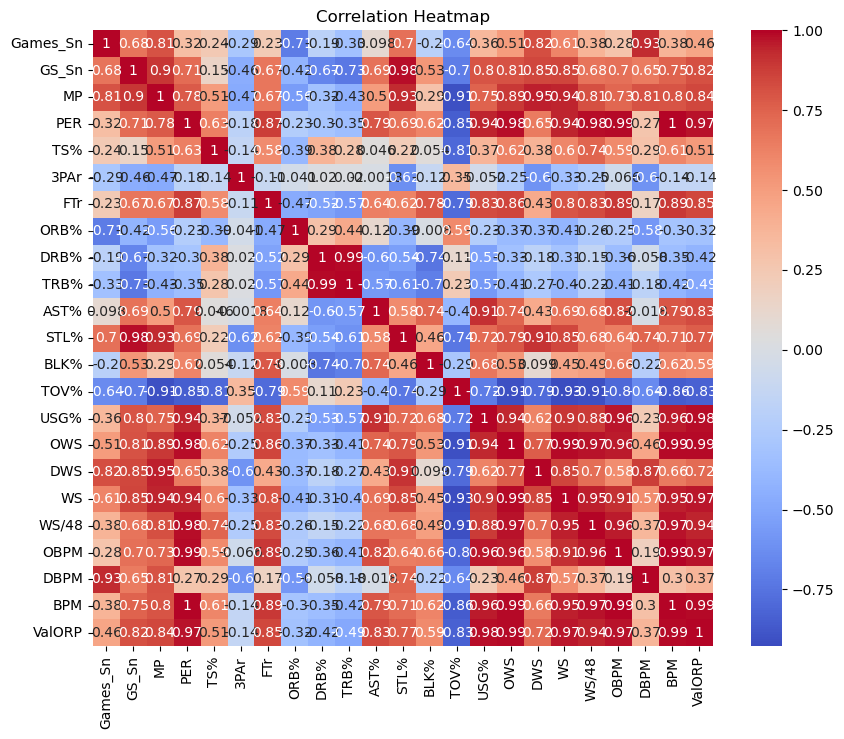

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(adv_stats.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
adv_stats.to_csv('adv_stats.csv', index=False)